In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv(r'option_calculations.csv')
df.head()


,id,option_id,started_at,finished_at,total_fixture_cost,total_replacement_cost,total_incentives,net_replacement_cost,total_fixture_cost_no_markup,created_at,...,proposed_kw,kw_proposed_annual_savings,payback,original_demand_cost_per_year,replacement_demand_cost_per_year,demand_savings_per_year,internal_return,loan_payment_without_tax,total_replacement_cost_post_financing,net_replacement_cost_post_financing
0,7654,7658,2020-06-05 23:47:37.601027,2020-06-05 23:47:38.537405,1917.918400,1917.918400,720.0000,1197.918400,1324.00,2020-05-27 21:14:08.583637,...,1.2600,0.8620,4.87,0.0,0.0,0.0,17.0,NaN,1917.918400,1197.918400
1,7718,7722,2020-07-20 17:15:08.167494,2020-07-20 17:15:57.137247,302649.734400,439593.454400,78273.0000,361320.454400,152636.30,2020-06-03 17:52:50.795422,...,82.7760,148.3800,4.58,0.0,0.0,0.0,19.0,NaN,439593.454400,361320.454400
2,6346,6381,2020-12-12 13:12:55.867666,2020-12-12 13:13:06.020752,50353.846154,77235.307692,16049.3000,61186.007692,32730.00,2020-01-16 23:53:08.708939,...,47.4915,79.7155,2.06,0.0,0.0,0.0,47.0,2145.425214,77235.307692,61186.007692
3,7743,7747,2020-09-22 19:19:44.251182,2020-09-22 19:19:58.022196,39367.480000,58214.480000,64160.5152,-5946.035200,32997.18,2020-06-07 07:07:36.466777,...,23.1820,62.5290,0.26,0.0,0.0,0.0,0.0,NaN,58214.480000,-5946.035200
4,7711,7715,2020-06-03 09:42:27.107033,2020-06-03 09:42:36.45513,0.000000,0.000000,0.0000,0.000000,0.00,2020-06-03 09:38:48.192876,...,30.8030,0.0000,NaN,0.0,0.0,0.0,0.0,NaN,0.000000,0.000000


In [29]:
df.columns

Index(['id', 'option_id', 'started_at', 'finished_at', 'total_fixture_cost',
       'total_replacement_cost', 'total_incentives', 'net_replacement_cost',
       'total_fixture_cost_no_markup', 'created_at', 'updated_at',
       'existing_kwh', 'proposed_kwh', 'kwh_proposed_annual_savings',
       'original_cost_per_year', 'replacement_cost_per_year',
       'total_savings_per_year', 'total_encentiv_savings',
       'total_incentive_179d', 'total_labor_cost', 'total_shipping_cost',
       'total_misc_cost', 'total_tax_cost', 'total_cogs',
       'total_savings_per_lamp_life', 'loan_payment', 'loan_duration',
       'loan_principal', 'started_at_all', 'started_at_option',
       'original_energy_cost_per_year', 'original_maintenance_cost_per_year',
       'original_heating_cost_per_year', 'original_cooling_cost_per_year',
       'replacement_energy_cost_per_year',
       'replacement_maintenance_cost_per_year',
       'replacement_heating_cost_per_year',
       'replacement_cooling_cost_

In [30]:
df.rename(columns = {'id':'option_calc_id'}, inplace = True)
df.columns

Index(['option_calc_id', 'option_id', 'started_at', 'finished_at',
       'total_fixture_cost', 'total_replacement_cost', 'total_incentives',
       'net_replacement_cost', 'total_fixture_cost_no_markup', 'created_at',
       'updated_at', 'existing_kwh', 'proposed_kwh',
       'kwh_proposed_annual_savings', 'original_cost_per_year',
       'replacement_cost_per_year', 'total_savings_per_year',
       'total_encentiv_savings', 'total_incentive_179d', 'total_labor_cost',
       'total_shipping_cost', 'total_misc_cost', 'total_tax_cost',
       'total_cogs', 'total_savings_per_lamp_life', 'loan_payment',
       'loan_duration', 'loan_principal', 'started_at_all',
       'started_at_option', 'original_energy_cost_per_year',
       'original_maintenance_cost_per_year', 'original_heating_cost_per_year',
       'original_cooling_cost_per_year', 'replacement_energy_cost_per_year',
       'replacement_maintenance_cost_per_year',
       'replacement_heating_cost_per_year',
       'replacement_c

In [31]:
print("Removing null values ")
print()
for i in df.columns:
    if (df[i].isnull().sum()/len(df))*100 >= 30:
        print(i,":", df[i].isnull().sum()/len(df)*100, "%")
        if i== 'payback':
            continue
        else:
            df.drop(i, axis=1,inplace=True)

Removing null values 

loan_payment : 89.10243509760515 %
loan_duration : 89.10243509760515 %
loan_principal : 89.10243509760515 %
payback : 31.787079895351177 %
loan_payment_without_tax : 94.69712215737573 %


In [32]:
print("Dropping columns which have mostly zero's ")
print()
for i in df.columns:
    if len(df[df[i]==0])/len(df)*100 >=85:
        print(i,":", len(df[df[i]==0])/len(df)*100,"%")
        df.drop(i, axis=1,inplace=True)
df

Dropping columns which have mostly zero's 

total_incentive_179d : 97.82652445159992 %
total_shipping_cost : 88.18675789897364 %
original_heating_cost_per_year : 96.951096800161 %
original_cooling_cost_per_year : 92.85570537331455 %
replacement_maintenance_cost_per_year : 89.20305896558664 %
replacement_heating_cost_per_year : 96.96115918695915 %
replacement_cooling_cost_per_year : 92.85570537331455 %
heating_savings_per_year : 97.23284363050915 %
cooling_savings_per_year : 93.12738981686456 %
total_recycling_cost : 86.83839806802173 %
original_demand_cost_per_year : 93.74119541155163 %
replacement_demand_cost_per_year : 93.74119541155163 %
demand_savings_per_year : 93.98269269470718 %


,option_calc_id,option_id,started_at,finished_at,total_fixture_cost,total_replacement_cost,total_incentives,net_replacement_cost,total_fixture_cost_no_markup,created_at,...,replacement_energy_cost_per_year,energy_savings_per_year,maintenance_savings_per_year,existing_kw,proposed_kw,kw_proposed_annual_savings,payback,internal_return,total_replacement_cost_post_financing,net_replacement_cost_post_financing
0,7654,7658,2020-06-05 23:47:37.601027,2020-06-05 23:47:38.537405,1917.918400,1917.918400,720.0000,1197.918400,1324.00,2020-05-27 21:14:08.583637,...,330.08976,225.823312,3.432000e+01,2.122,1.2600,0.8620,4.87,17.0,1917.918400,1197.918400
1,7718,7722,2020-07-20 17:15:08.167494,2020-07-20 17:15:57.137247,302649.734400,439593.454400,78273.0000,361320.454400,152636.30,2020-06-03 17:52:50.795422,...,30990.32000,56038.024000,1.787270e+04,231.156,82.7760,148.3800,4.58,19.0,439593.454400,361320.454400
2,6346,6381,2020-12-12 13:12:55.867666,2020-12-12 13:13:06.020752,50353.846154,77235.307692,16049.3000,61186.007692,32730.00,2020-01-16 23:53:08.708939,...,17657.33970,29638.222900,0.000000e+00,127.207,47.4915,79.7155,2.06,47.0,77235.307692,61186.007692
3,7743,7747,2020-09-22 19:19:44.251182,2020-09-22 19:19:58.022196,39367.480000,58214.480000,64160.5152,-5946.035200,32997.18,2020-06-07 07:07:36.466777,...,4277.07900,11536.600500,1.095500e+04,85.711,23.1820,62.5290,0.26,0.0,58214.480000,-5946.035200
4,7711,7715,2020-06-03 09:42:27.107033,2020-06-03 09:42:36.45513,0.000000,0.000000,0.0000,0.000000,0.00,2020-06-03 09:38:48.192876,...,8386.71400,0.000000,1.065814e-14,30.803,30.8030,0.0000,NaN,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9933,3903,3938,2021-04-28 22:01:56.60355,2021-04-28 22:01:59.454353,0.000000,13405.000000,7050.0000,6355.000000,0.00,2019-04-19 04:00:22.332409,...,6899.25600,-6899.256000,0.000000e+00,37.800,37.8000,0.0000,NaN,0.0,13405.000000,6355.000000
9934,4223,4258,2021-04-28 22:04:08.575947,2021-04-28 22:04:12.198374,0.000000,0.000000,0.0000,0.000000,0.00,2019-06-11 04:12:56.312148,...,3661.36398,0.000000,0.000000e+00,8.931,8.9310,0.0000,NaN,0.0,0.000000,0.000000
9935,3837,3872,2021-04-28 22:01:51.795137,2021-04-28 22:01:53.788241,0.000000,0.000000,0.0000,0.000000,0.00,2019-04-10 02:18:29.988678,...,9305.98400,0.000000,0.000000e+00,21.344,21.3440,0.0000,NaN,0.0,0.000000,0.000000
9936,4069,4104,2021-04-28 22:02:25.6062,2021-04-28 22:02:28.493686,0.000000,0.000000,0.0000,0.000000,0.00,2019-05-14 16:46:39.715746,...,5568.72940,0.000000,0.000000e+00,20.017,20.0170,0.0000,NaN,0.0,0.000000,0.000000


In [33]:
f=pd.read_csv(r'option_calc_lightings.csv')
f

,id,option_calculation_id,existing_lighting_id,solution_id,use,started_at,finished_at,existing_quantity,proposed_quantity
0,41272,5545,39580,NaN,t,2020-09-22 19:26:41.59626,2020-09-22 19:26:41.602818,0,0
1,4,1,15701,NaN,t,2020-03-21 19:09:11.43746,2020-03-21 19:09:11.444008,188,0
2,5,1,15700,17556.0,t,2020-03-21 19:09:11.466992,2020-03-21 19:09:11.478303,2,2
3,32,1,15673,17403.0,t,2020-03-21 19:09:12.453801,2020-03-21 19:09:12.47004,14,14
4,34,1,15671,NaN,t,2020-03-21 19:09:12.545806,2020-03-21 19:09:12.55322,66,0
...,...,...,...,...,...,...,...,...,...
88071,27991,4011,27091,NaN,t,2021-04-28 22:01:26.396734,2021-04-28 22:01:26.419029,36,0
88072,25122,3635,23871,NaN,t,2021-04-28 22:01:31.400943,2021-04-28 22:01:31.422811,62,0
88073,11470,1721,12667,8508.0,f,2021-04-28 22:01:48.810626,2021-04-28 22:01:48.866478,0,0
88074,27184,3920,19383,34392.0,f,2021-04-28 22:03:29.360509,2021-04-28 22:03:29.393015,0,0


In [34]:
f.columns

Index(['id', 'option_calculation_id', 'existing_lighting_id', 'solution_id',
       'use', 'started_at', 'finished_at', 'existing_quantity',
       'proposed_quantity'],
      dtype='object')

In [35]:
f.rename(columns = {'option_calculation_id':'option_calc_id'}, inplace = True)
f.columns

Index(['id', 'option_calc_id', 'existing_lighting_id', 'solution_id', 'use',
       'started_at', 'finished_at', 'existing_quantity', 'proposed_quantity'],
      dtype='object')

In [36]:
print("Removing null values ")
print()

for i in f.columns:
    if (f[i].isnull().sum()/len(f))*100 >= 30:
        print(i,":", f[i].isnull().sum()/len(f)*100,"%")
        f.drop(i, axis=1,inplace=True)

print("Dropping columns which have mostly zero's ")
print()

        
for i in f.columns:
    if len(f[f[i]==0])/len(f)*100 >=85:
        print(i,":", len(f[f[i]==0])/len(f)*100,"%")
        f.drop(i, axis=1,inplace=True)

Removing null values 

solution_id : 53.21426949452746 %
Dropping columns which have mostly zero's 



In [37]:
f.columns

Index(['id', 'option_calc_id', 'existing_lighting_id', 'use', 'started_at',
       'finished_at', 'existing_quantity', 'proposed_quantity'],
      dtype='object')

In [38]:
#option_calculations.id = option_calc_lightings.option_calc_id 
#option_calculations.id --> option_calculations.option_calc_id (Renaming)
#option_calc_lightings.option_calculations_id --> option_calc_lightings.option_calc_id(Renaming)

print("Merging both dataframes on column option_calc_id")
df=(pd.merge(df, f, on = 'option_calc_id',how='inner'))


Merging both dataframes on column option_calc_id


In [39]:
df.columns

Index(['option_calc_id', 'option_id', 'started_at_x', 'finished_at_x',
       'total_fixture_cost', 'total_replacement_cost', 'total_incentives',
       'net_replacement_cost', 'total_fixture_cost_no_markup', 'created_at',
       'updated_at', 'existing_kwh', 'proposed_kwh',
       'kwh_proposed_annual_savings', 'original_cost_per_year',
       'replacement_cost_per_year', 'total_savings_per_year',
       'total_encentiv_savings', 'total_labor_cost', 'total_misc_cost',
       'total_tax_cost', 'total_cogs', 'total_savings_per_lamp_life',
       'started_at_all', 'started_at_option', 'original_energy_cost_per_year',
       'original_maintenance_cost_per_year',
       'replacement_energy_cost_per_year', 'energy_savings_per_year',
       'maintenance_savings_per_year', 'existing_kw', 'proposed_kw',
       'kw_proposed_annual_savings', 'payback', 'internal_return',
       'total_replacement_cost_post_financing',
       'net_replacement_cost_post_financing', 'id', 'existing_lighting_id',
  

In [40]:
f[f['option_calc_id'].duplicated()]

,id,option_calc_id,existing_lighting_id,use,started_at,finished_at,existing_quantity,proposed_quantity
2,5,1,15700,t,2020-03-21 19:09:11.466992,2020-03-21 19:09:11.478303,2,2
3,32,1,15673,t,2020-03-21 19:09:12.453801,2020-03-21 19:09:12.47004,14,14
4,34,1,15671,t,2020-03-21 19:09:12.545806,2020-03-21 19:09:12.55322,66,0
5,20,1,15685,t,2020-03-21 19:09:12.018197,2020-03-21 19:09:12.031892,3,18
6,37,1,15668,t,2020-03-21 19:09:12.661693,2020-03-21 19:09:12.667587,47,0
...,...,...,...,...,...,...,...,...
88071,27991,4011,27091,t,2021-04-28 22:01:26.396734,2021-04-28 22:01:26.419029,36,0
88072,25122,3635,23871,t,2021-04-28 22:01:31.400943,2021-04-28 22:01:31.422811,62,0
88073,11470,1721,12667,f,2021-04-28 22:01:48.810626,2021-04-28 22:01:48.866478,0,0
88074,27184,3920,19383,f,2021-04-28 22:03:29.360509,2021-04-28 22:03:29.393015,0,0


ROI= savings/expenditure

expenditure= total_fixture_cost+ total_replacement_cost + net_replacement_cost + total_fixture_cost_no_markup+'original_cost_per_year'+ 'replacement_cost_per_year' + 'total_labor_cost'+ 'total_misc_cost'+
+total_cogs+'total_tax_cost' +  replacement_energy_cost_per_year+ net_replacement_cost_post_financing+total_replacement_cost_post_financing

savings=total_savings_per_year + maintenance_savings_per_year+total_encentiv_savings+

In [41]:
print("just checking some columns")

df[['total_savings_per_year','maintenance_savings_per_year','total_encentiv_savings','total_savings_per_lamp_life','energy_savings_per_year','kw_proposed_annual_savings','total_incentives']]


just checking some columns


,total_savings_per_year,maintenance_savings_per_year,total_encentiv_savings,total_savings_per_lamp_life,energy_savings_per_year,kw_proposed_annual_savings,total_incentives
0,2.601433e+02,3.432000e+01,720.0,5.837240e+03,225.823312,0.862,720.0
1,2.601433e+02,3.432000e+01,720.0,5.837240e+03,225.823312,0.862,720.0
2,2.601433e+02,3.432000e+01,720.0,5.837240e+03,225.823312,0.862,720.0
3,7.391073e+04,1.787270e+04,78273.0,9.791389e+05,56038.024000,148.380,78273.0
4,7.391073e+04,1.787270e+04,78273.0,9.791389e+05,56038.024000,148.380,78273.0
...,...,...,...,...,...,...,...
88071,9.237056e-14,9.237056e-14,0.0,2.108917e-13,0.000000,0.000,0.0
88072,9.237056e-14,9.237056e-14,0.0,2.108917e-13,0.000000,0.000,0.0
88073,9.237056e-14,9.237056e-14,0.0,2.108917e-13,0.000000,0.000,0.0
88074,9.237056e-14,9.237056e-14,0.0,2.108917e-13,0.000000,0.000,0.0


In [42]:
df.columns

Index(['option_calc_id', 'option_id', 'started_at_x', 'finished_at_x',
       'total_fixture_cost', 'total_replacement_cost', 'total_incentives',
       'net_replacement_cost', 'total_fixture_cost_no_markup', 'created_at',
       'updated_at', 'existing_kwh', 'proposed_kwh',
       'kwh_proposed_annual_savings', 'original_cost_per_year',
       'replacement_cost_per_year', 'total_savings_per_year',
       'total_encentiv_savings', 'total_labor_cost', 'total_misc_cost',
       'total_tax_cost', 'total_cogs', 'total_savings_per_lamp_life',
       'started_at_all', 'started_at_option', 'original_energy_cost_per_year',
       'original_maintenance_cost_per_year',
       'replacement_energy_cost_per_year', 'energy_savings_per_year',
       'maintenance_savings_per_year', 'existing_kw', 'proposed_kw',
       'kw_proposed_annual_savings', 'payback', 'internal_return',
       'total_replacement_cost_post_financing',
       'net_replacement_cost_post_financing', 'id', 'existing_lighting_id',
  

In [43]:
df[['maintenance_savings_per_year','total_savings_per_lamp_life','internal_return']].corr()

,maintenance_savings_per_year,total_savings_per_lamp_life,internal_return
maintenance_savings_per_year,1.000000,0.000577,0.001327
total_savings_per_lamp_life,0.000577,1.000000,0.000104
internal_return,0.001327,0.000104,1.000000


In [44]:
savings_df=df[['option_calc_id', 'option_id', 'started_at_x', 'finished_at_x',
        'total_incentives','payback',
        'created_at',
       'updated_at', 
        'total_savings_per_year',
        'total_cogs',
       'started_at_all', 'started_at_option',  'energy_savings_per_year',
       'maintenance_savings_per_year', 'internal_return',
       'existing_lighting_id', 'use', 'started_at_y', 'finished_at_y',
       'existing_quantity', 'proposed_quantity','existing_kwh', 'proposed_kwh','kwh_proposed_annual_savings','existing_kw', 'proposed_kw',
       'kw_proposed_annual_savings']]

In [45]:
#After merging df and f
savings_df.shape

(88076, 27)

<AxesSubplot:>

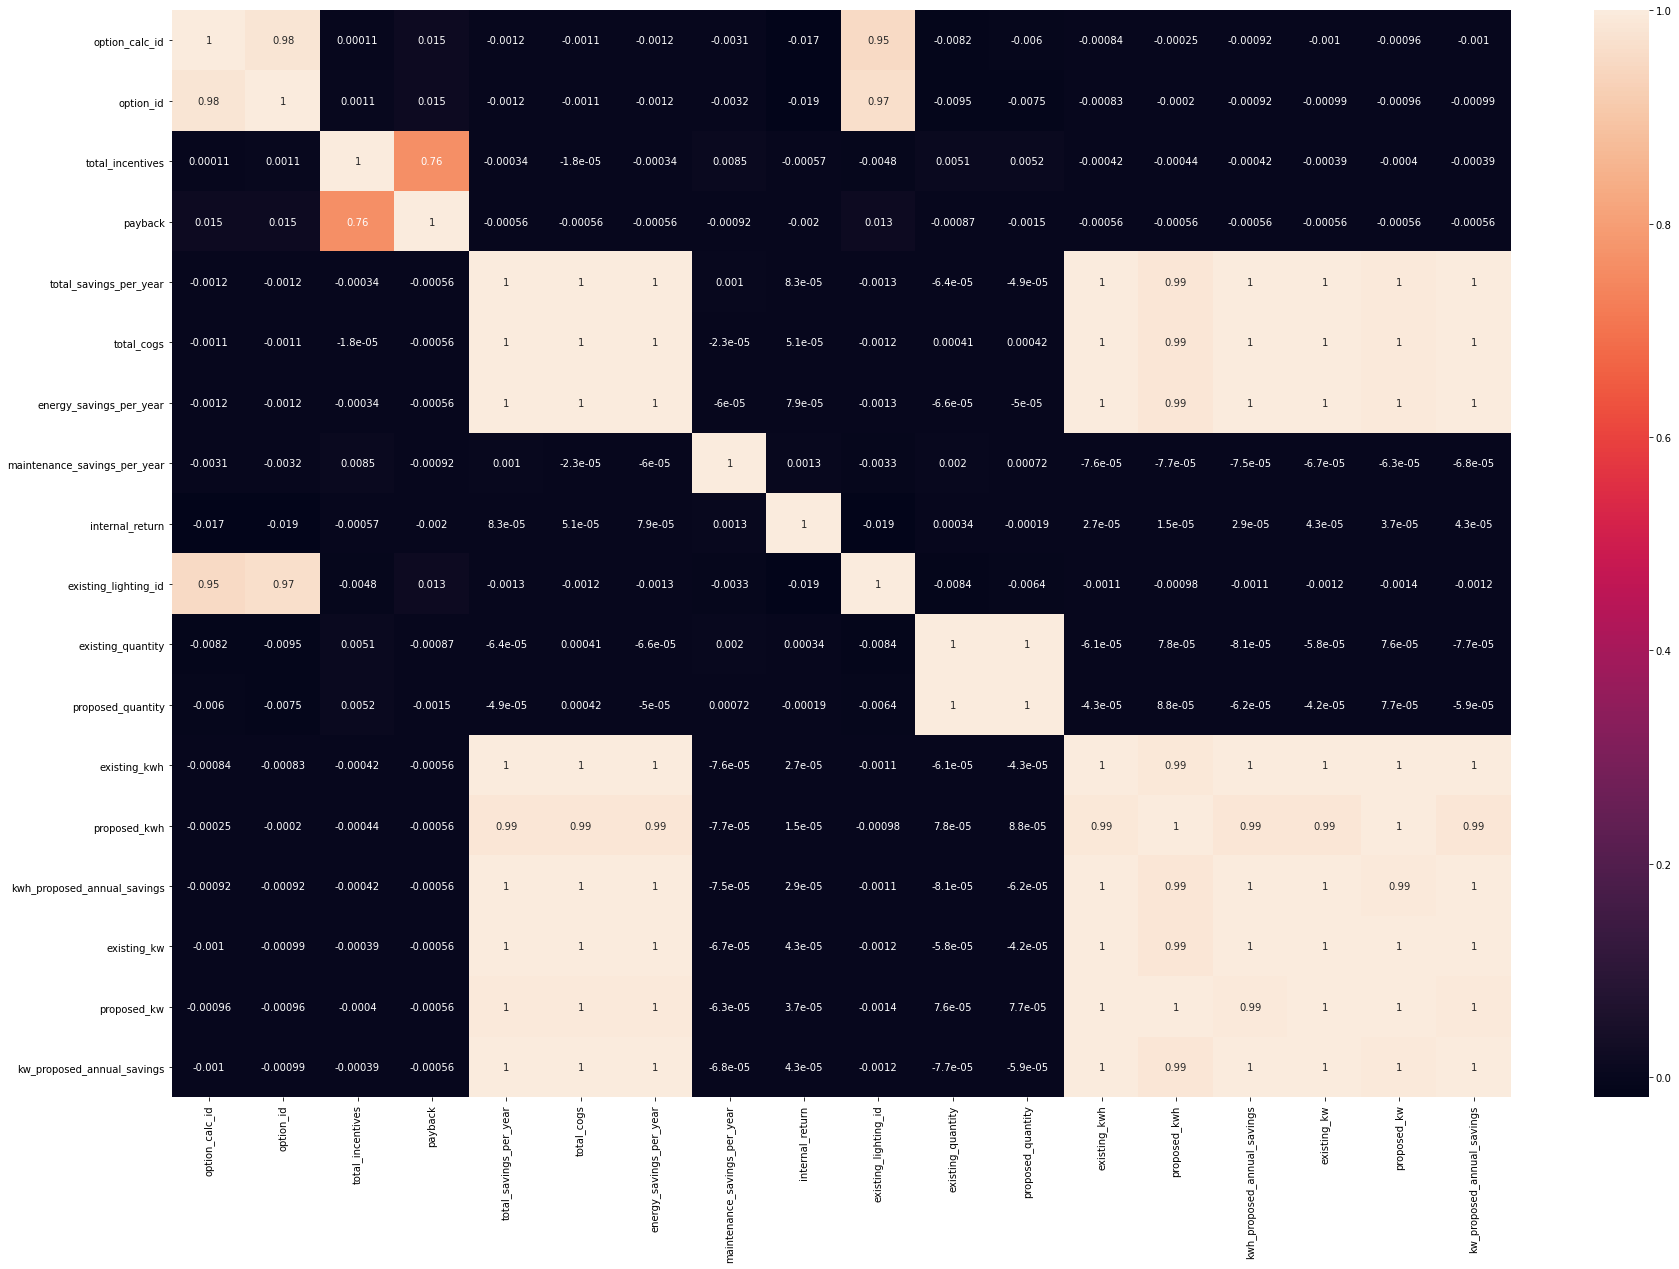

In [46]:
plt.figure(figsize=(30,20))

sns.light_palette("seagreen", as_cmap=True)
sns.heatmap(savings_df.corr(), annot=True)

<AxesSubplot:>

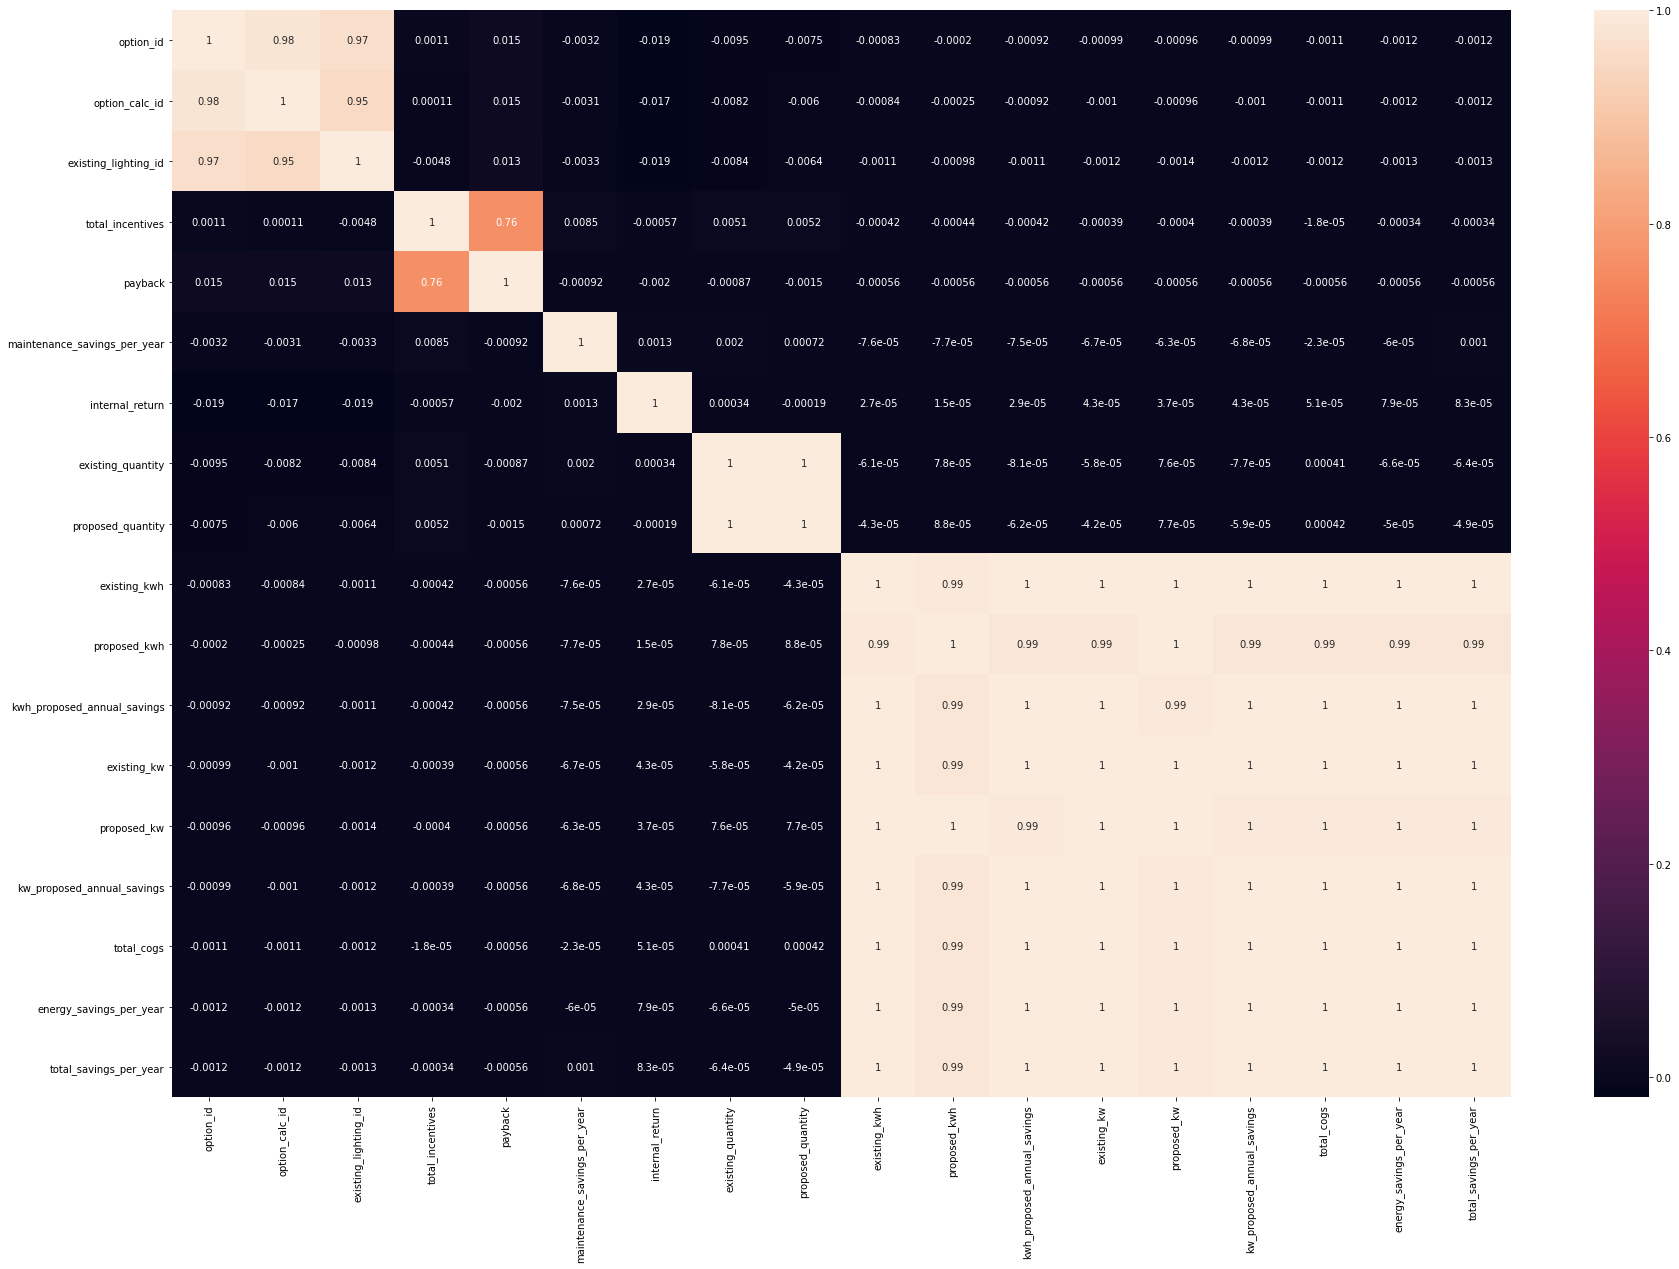

In [47]:
savings_df=df[['option_id','option_calc_id','existing_lighting_id','use','created_at',
       'updated_at',
        'total_incentives','payback',
       'maintenance_savings_per_year', 'internal_return',
        'existing_quantity', 'proposed_quantity','existing_kwh', 'proposed_kwh','kwh_proposed_annual_savings','existing_kw', 'proposed_kw',
       'kw_proposed_annual_savings','total_cogs','energy_savings_per_year',        'total_savings_per_year',]]

plt.figure(figsize=(30,20))

sns.light_palette("seagreen", as_cmap=True)
sns.heatmap(savings_df.corr(), annot=True)

In [35]:
savings_df.to_csv('Savings_subtasks.csv')

In [48]:
savings_df.columns

Index(['option_id', 'option_calc_id', 'existing_lighting_id', 'use',
       'created_at', 'updated_at', 'total_incentives', 'payback',
       'maintenance_savings_per_year', 'internal_return', 'existing_quantity',
       'proposed_quantity', 'existing_kwh', 'proposed_kwh',
       'kwh_proposed_annual_savings', 'existing_kw', 'proposed_kw',
       'kw_proposed_annual_savings', 'total_cogs', 'energy_savings_per_year',
       'total_savings_per_year'],
      dtype='object')

In [50]:
savings_df=savings_df[['option_id', 'option_calc_id', 'existing_lighting_id', 'use',  'created_at', 'updated_at',
       'total_incentives', 'payback', 'maintenance_savings_per_year',
       'internal_return', 'existing_quantity', 'proposed_quantity',
       'existing_kwh', 'proposed_kwh', 'kwh_proposed_annual_savings',
       'existing_kw', 'proposed_kw', 'kw_proposed_annual_savings',
       'total_cogs', 'energy_savings_per_year', 'total_savings_per_year']]
import numpy as np
corr=savings_df.corr()

<AxesSubplot:>

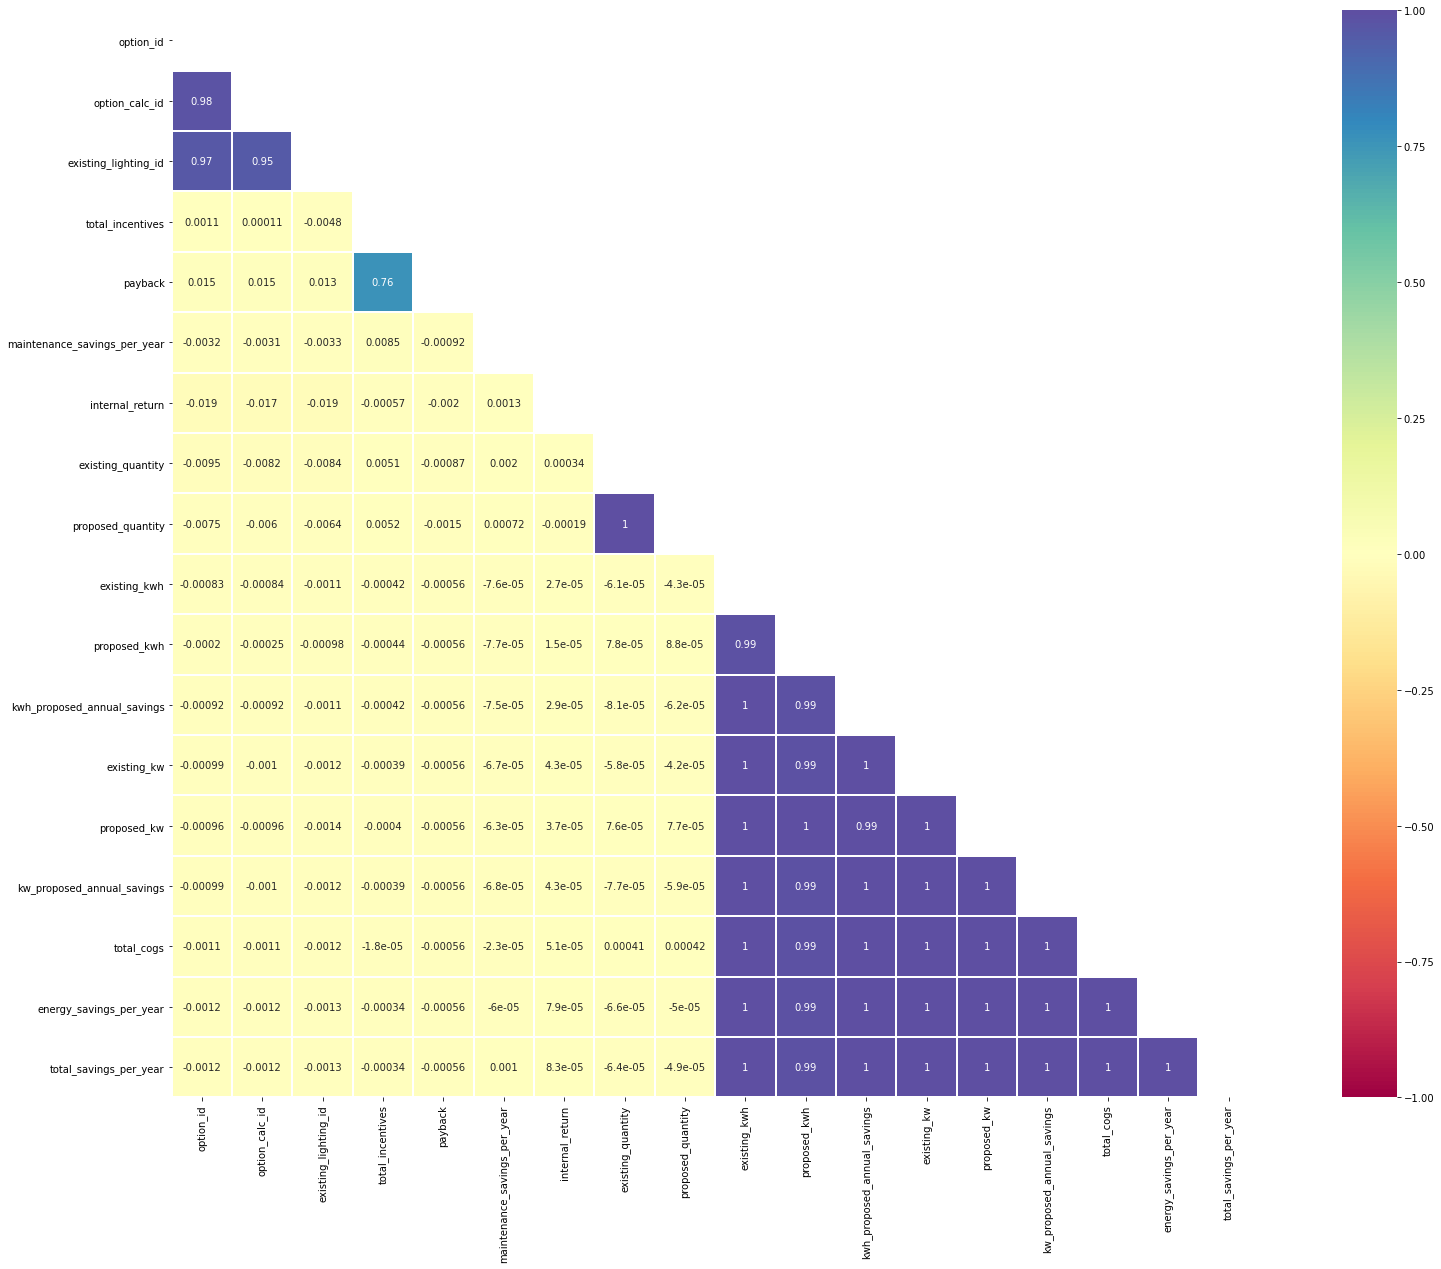

In [51]:

mask=np.zeros(corr.shape,dtype=bool)
mask[np.triu_indices(len(mask))]=True
plt.figure(figsize=(30,20))
sns.heatmap(corr,annot=True,vmin=-1,vmax=1,cmap='Spectral',square=True,mask=mask,linecolor='white',linewidths=1)


In [47]:
savings_df.to_csv('Savings_subtasks.csv')

In [52]:
len(savings_df.columns)
savings_df.columns

Index(['option_id', 'option_calc_id', 'existing_lighting_id', 'use',
       'created_at', 'updated_at', 'total_incentives', 'payback',
       'maintenance_savings_per_year', 'internal_return', 'existing_quantity',
       'proposed_quantity', 'existing_kwh', 'proposed_kwh',
       'kwh_proposed_annual_savings', 'existing_kw', 'proposed_kw',
       'kw_proposed_annual_savings', 'total_cogs', 'energy_savings_per_year',
       'total_savings_per_year'],
      dtype='object')

In [53]:
print("Columns with null values ")
print()

for i in savings_df.columns:
    if (savings_df[i].isnull().sum()/len(savings_df))*100 >= 30:
        print(i,":", savings_df[i].isnull().sum()/len(savings_df)*100,"%")
        
print()
print(" columns which have mostly zero's ")
print()

        
for i in savings_df.columns:
    if len(savings_df[savings_df[i]==0])/len(savings_df)*100 >=85:
        print(i,":", len(savings_df[savings_df[i]==0])/len(savings_df)*100,"%")


Columns with null values 

payback : 33.93773559198874 %

 columns which have mostly zero's 



In [55]:
opt=pd.read_csv(r'options.csv')
opt.head(5)

opt.columns



Index(['id', 'project_id', 'name', 'active', 'inactive_at',
       'operating_schedule_id', 'rate_schedule_id', 'created_by_user_id',
       'created_at', 'updated_at', 'installation_labor_rate', 'markup',
       'labor_cost', 'shipping_cost', 'misc_cost', 'all_solutions',
       'financing_debt_percentage', 'financing_interest_rate',
       'financing_loan_months', 'incentive_179d', 'rebates',
       'disable_solution_rebates', 'finance_discount_rate', 'finance_term',
       'recycling_cost', 'assigned_rebates', 'disable_savings_cooling',
       'disable_savings_heating', 'disable_savings_maintenance'],
      dtype='object')

In [56]:
pro=pd.read_csv(r'projects.csv',encoding="ISO-8859-1")
pro.columns


Index(['id', 'company_id', 'name', 'created_by_user_id', 'created_at',
       'updated_at', 'company_project_status_id', 'client_id', 'contact_id',
       'active', 'inactive_at', 'utility_id', 'utility_rate_plan',
       'facility_type_id', 'rate_schedule_id', 'operating_schedule_id',
       'cooling_id', 'heating_id', 'internal_notes', 'notes',
       'prepared_for_user_id', 'prepared_by_user_id', 'maintenance_labor_rate',
       'markup', 'apply_tax_on', 'tax_type', 'tax_rate_source', 'tax_rate',
       'encentiv_id', 'financing_debt_percentage', 'financing_interest_rate',
       'financing_loan_months', 'incentive_max_type', 'incentive_max',
       'all_company_access', 'client_logo', 'markup_type', 'test',
       'probability', 'expected_close_date', 'shipping_address_location',
       'rebate_bus_id', 'highest_value_option_id', 'audit_status', 'uuid',
       'funding_status', 'enable_sync', 'finance_discount_rate',
       'finance_term', 'copied_from_id', 'copy_status', 'tax_exem

In [57]:
savings_df.columns

Index(['option_id', 'option_calc_id', 'existing_lighting_id', 'use',
       'created_at', 'updated_at', 'total_incentives', 'payback',
       'maintenance_savings_per_year', 'internal_return', 'existing_quantity',
       'proposed_quantity', 'existing_kwh', 'proposed_kwh',
       'kwh_proposed_annual_savings', 'existing_kw', 'proposed_kw',
       'kw_proposed_annual_savings', 'total_cogs', 'energy_savings_per_year',
       'total_savings_per_year'],
      dtype='object')

In [58]:
opt.shape, pro.shape

((9942, 29), (11800, 54))

In [59]:
# projects.id --> projects. project_id (Renaming)
# options.project_id = projects.id --> options.project_id = projects. project_id
 
pro.rename(columns = {'id':'project_id'}, inplace = True)
opt_pro=pd.merge(opt, pro, on = 'project_id',how='inner')

In [60]:
opt_pro.shape

(9942, 82)

In [61]:
opt_pro.columns


Index(['id', 'project_id', 'name_x', 'active_x', 'inactive_at_x',
       'operating_schedule_id_x', 'rate_schedule_id_x', 'created_by_user_id_x',
       'created_at_x', 'updated_at_x', 'installation_labor_rate', 'markup_x',
       'labor_cost', 'shipping_cost', 'misc_cost', 'all_solutions',
       'financing_debt_percentage_x', 'financing_interest_rate_x',
       'financing_loan_months_x', 'incentive_179d', 'rebates',
       'disable_solution_rebates', 'finance_discount_rate_x', 'finance_term_x',
       'recycling_cost', 'assigned_rebates', 'disable_savings_cooling',
       'disable_savings_heating', 'disable_savings_maintenance', 'company_id',
       'name_y', 'created_by_user_id_y', 'created_at_y', 'updated_at_y',
       'company_project_status_id', 'client_id', 'contact_id', 'active_y',
       'inactive_at_y', 'utility_id', 'utility_rate_plan', 'facility_type_id',
       'rate_schedule_id_y', 'operating_schedule_id_y', 'cooling_id',
       'heating_id', 'internal_notes', 'notes', 'p

In [62]:
opt_pro=opt_pro[['id', 'project_id','company_id','encentiv_id','rebates','assigned_rebates','disable_solution_rebates']]

In [63]:
#projects.company_id=companies.id
com=pd.read_csv(r'companies.csv',encoding="ISO-8859-1")
com.columns


Index(['id', 'name', 'primary_contact_user_id', 'billing_contact_name',
       'created_at', 'updated_at', 'created_by_user_id', 'active',
       'inactive_at', 'status', 'industry_type_id', 'description',
       'office_phone', 'billing_same_as_company', 'default_proposal_theme_id',
       'default_proposal_footer', 'default_estimates_footer', 'default_intro',
       'default_team', 'default_legal', 'default_disclaimers',
       'default_references', 'default_estimates', 'logo', 'markup_type',
       'markup', 'test', 'vendor', 'partner', 'buyer', 'stripe_customer_id',
       'sales_users_count', 'billing_contact_email', 'stripe_status',
       'stripe_id', 'referral_notes', 'sales_rep_user_id',
       'support_manager_user_id', 'referral_user_id', 'referral_company_id',
       'financier', 'default_tag_line', 'default_credit_worthiness',
       'default_num_payments_per_year',
       'default_vendor_interest_rate_percentage',
       'default_financier_markup_modifier_percentage',
   

In [64]:
com.shape

(699, 76)

In [78]:
#companies. id-->companies. company_id (Renaming)
#projects.company_id=companies.id --> projects.company_id=companies.company_id
#opt=options +projects
#savings_df= option_calculations + option_calc_lightings 
# opt_pro_com= options + projects + companies

com.rename(columns = {'id':'company_id'}, inplace = True)
opt_pro_com=pd.merge(opt_pro, com, on = 'company_id',how='inner')

In [79]:
opt_pro_com.shape

(9942, 82)

In [80]:
opt_pro.shape

(9942, 7)

In [82]:
'''print(len(opt_pro_com.columns))

print("Removing null values ")
print()

for i in opt_pro_com.columns:
    if (opt_pro_com[i].isnull().sum()/len(opt_pro_com))*100 >= 51:
        print(i,":", opt_pro_com[i].isnull().sum()/len(opt_pro_com)*100,"%")
        opt_pro_com.drop(i, axis=1,inplace=True)

print("Dropping columns which have mostly zero's ")
print()

        
for i in opt_pro_com.columns:
    if len(opt_pro_com[opt_pro_com[i]==0])/len(opt_pro_com)*100 >=85:
        print(i,":", len(opt_pro_com[opt_pro_com[i]==0])/len(opt_pro_com)*100'''

opt_pro_com.columns


Index(['id', 'project_id', 'company_id', 'encentiv_id', 'rebates',
       'assigned_rebates', 'disable_solution_rebates', 'name',
       'industry_type_id', 'default_lighting_template_id'],
      dtype='object')

In [83]:
opt_pro_com=opt_pro_com[['id', 'project_id', 'company_id', 'encentiv_id', 'rebates',
       'assigned_rebates', 'disable_solution_rebates', 'name','industry_type_id','default_lighting_template_id']]

In [84]:
len(opt_pro_com.columns)
opt_pro_com.shape, savings_df.shape

((9942, 10), (88076, 21))

In [85]:
opt_pro_com.columns

Index(['id', 'project_id', 'company_id', 'encentiv_id', 'rebates',
       'assigned_rebates', 'disable_solution_rebates', 'name',
       'industry_type_id', 'default_lighting_template_id'],
      dtype='object')

In [86]:
savings_df.columns

Index(['option_id', 'option_calc_id', 'existing_lighting_id', 'use',
       'created_at', 'updated_at', 'total_incentives', 'payback',
       'maintenance_savings_per_year', 'internal_return', 'existing_quantity',
       'proposed_quantity', 'existing_kwh', 'proposed_kwh',
       'kwh_proposed_annual_savings', 'existing_kw', 'proposed_kw',
       'kw_proposed_annual_savings', 'total_cogs', 'energy_savings_per_year',
       'total_savings_per_year'],
      dtype='object')

In [87]:
# opt_pro_com.id --> opt_pro_com.option_id

opt_pro_com.rename(columns = {'id':'option_id'}, inplace = True)


SAVINGS =  option_calculations + option_calc_lightings + options + projects + companies

In [112]:
# opt_pro_com.option_id =savings_df.option_id
#
SAVINGS = pd.merge(savings_df, opt_pro_com, on = 'option_id',how='inner')


In [114]:
SAVINGS.columns

Index(['option_id', 'option_calc_id', 'existing_lighting_id', 'use',
       'created_at', 'updated_at', 'total_incentives', 'payback',
       'maintenance_savings_per_year', 'internal_return', 'existing_quantity',
       'proposed_quantity', 'existing_kwh', 'proposed_kwh',
       'kwh_proposed_annual_savings', 'existing_kw', 'proposed_kw',
       'kw_proposed_annual_savings', 'total_cogs', 'energy_savings_per_year',
       'total_savings_per_year', 'project_id', 'company_id', 'encentiv_id',
       'rebates', 'assigned_rebates', 'disable_solution_rebates', 'name',
       'industry_type_id', 'default_lighting_template_id'],
      dtype='object')

In [115]:
print(" null values ")
print()

for i in SAVINGS.columns:
    if (SAVINGS[i].isnull().sum()/len(SAVINGS))*100 >= 51:
        print(i,":", SAVINGS[i].isnull().sum()/len(SAVINGS)*100,"%")

print(" columns which have mostly zero's ")
print()

        
for i in SAVINGS.columns:
    if len(SAVINGS[SAVINGS[i]==0])/len(SAVINGS)*100 >=85:
        print(i,":", len(SAVINGS[SAVINGS[i]==0])/len(SAVINGS)*100,"%")

 null values 

encentiv_id : 97.95744584222716 %
rebates : 80.58267859575821 %
industry_type_id : 54.241791180344244 %
 columns which have mostly zero's 



In [116]:
SAVINGS.columns

Index(['option_id', 'option_calc_id', 'existing_lighting_id', 'use',
       'created_at', 'updated_at', 'total_incentives', 'payback',
       'maintenance_savings_per_year', 'internal_return', 'existing_quantity',
       'proposed_quantity', 'existing_kwh', 'proposed_kwh',
       'kwh_proposed_annual_savings', 'existing_kw', 'proposed_kw',
       'kw_proposed_annual_savings', 'total_cogs', 'energy_savings_per_year',
       'total_savings_per_year', 'project_id', 'company_id', 'encentiv_id',
       'rebates', 'assigned_rebates', 'disable_solution_rebates', 'name',
       'industry_type_id', 'default_lighting_template_id'],
      dtype='object')

In [121]:
#grouping ids, energy features , savings costs together
SAVINGS=SAVINGS[['option_id',  'option_calc_id','project_id', 'company_id', 'existing_lighting_id','encentiv_id',
              'industry_type_id', 'default_lighting_template_id', 'use',
       'created_at', 'updated_at','rebates', 'assigned_rebates', 'disable_solution_rebates', 'name', 
         'existing_quantity','proposed_quantity', 'existing_kwh', 'proposed_kwh','kwh_proposed_annual_savings',
        'existing_kw', 'proposed_kw',
       'kw_proposed_annual_savings', 'energy_savings_per_year','total_cogs','total_incentives','internal_return', 'payback',
       'maintenance_savings_per_year','total_savings_per_year' ]]

In [122]:
SAVINGS.shape


(88076, 30)

In [123]:
SAVINGS.columns
SAVINGS.head()

,option_id,option_calc_id,project_id,company_id,existing_lighting_id,encentiv_id,industry_type_id,default_lighting_template_id,use,created_at,...,existing_kw,proposed_kw,kw_proposed_annual_savings,energy_savings_per_year,total_cogs,total_incentives,internal_return,payback,maintenance_savings_per_year,total_savings_per_year
0,7658,7654,8514,795.0,56261,NaN,NaN,763,t,2020-05-27 21:14:08.583637,...,2.122,1.260,0.862,225.823312,1324.0,720.0,17.0,4.87,34.320000,260.143312
1,7658,7654,8514,795.0,56839,NaN,NaN,763,t,2020-05-27 21:14:08.583637,...,2.122,1.260,0.862,225.823312,1324.0,720.0,17.0,4.87,34.320000,260.143312
2,7658,7654,8514,795.0,56840,NaN,NaN,763,t,2020-05-27 21:14:08.583637,...,2.122,1.260,0.862,225.823312,1324.0,720.0,17.0,4.87,34.320000,260.143312
3,7722,7718,8592,407.0,56667,NaN,NaN,375,t,2020-06-03 17:52:50.795422,...,231.156,82.776,148.380,56038.024000,286842.5,78273.0,19.0,4.58,17872.704157,73910.728157
4,7722,7718,8592,407.0,56666,NaN,NaN,375,t,2020-06-03 17:52:50.795422,...,231.156,82.776,148.380,56038.024000,286842.5,78273.0,19.0,4.58,17872.704157,73910.728157


In [124]:
SAVINGS.columns

Index(['option_id', 'option_calc_id', 'project_id', 'company_id',
       'existing_lighting_id', 'encentiv_id', 'industry_type_id',
       'default_lighting_template_id', 'use', 'created_at', 'updated_at',
       'rebates', 'assigned_rebates', 'disable_solution_rebates', 'name',
       'existing_quantity', 'proposed_quantity', 'existing_kwh',
       'proposed_kwh', 'kwh_proposed_annual_savings', 'existing_kw',
       'proposed_kw', 'kw_proposed_annual_savings', 'energy_savings_per_year',
       'total_cogs', 'total_incentives', 'internal_return', 'payback',
       'maintenance_savings_per_year', 'total_savings_per_year'],
      dtype='object')

In [125]:
SAVINGS.to_csv('SAVINGS.csv')